## Demo of NLP functionality
Here we describe some of the available tools to help you with nlp tasks.

### Annotations to POS / IOB Format

`AnnotationBuilder` provides various functionality for dealing with annotations

In [1]:
import os
os.chdir("/Users/vtshitoyan/dev/TRI/matstract")

from matstract.models.annotation_builder import AnnotationBuilder
builder = AnnotationBuilder()
annotations = builder.get_annotations(user=None)  # you can specify the user_key to get annotations of specific user

`annotations` is a list of `Annotation` objects containing all relevant annotaiton information. You can use the `to_iob()` method to get part of speech tags and IOB annotation used for named entity recognition

In [ ]:
from pprint import pprint
for an in annotations:
    iob, iob_str = an.to_iob(phrases=True)
    pprint(iob_str)

('sputtering N B-SMT\n'
 'of I O\n'
 'ordered V B-DSC\n'
 'nickel NN B-MAT\n'
 '- HYPH I-MAT\n'
 'aluminium NN I-MAT\n'
 'alloys N B-DSC\n'
 'II CD O\n'
 '. . O\n'
 '\n'
 'preferential J O\n'
 'sputtering N B-SMT\n'
 'of I O\n'
 'AlNi J B-MAT\n'
 'single_crystals JJ_NNS B-DSC\n'
 'and CC O\n'
 'discussion NN O\n'
 '\n'
 'atom NN B-CMT\n'
 '- HYPH I-CMT\n'
 'probe NN I-CMT\n'
 'field NN I-CMT\n'
 '- HYPH I-CMT\n'
 'ion NN I-CMT\n'
 'microscopy NN I-CMT\n'
 'together RB O\n'
 'with IN O\n'
 'x-ray_photoelectron NN_NN B-CMT\n'
 'spectroscopy NN I-CMT\n'
 'and C O\n'
 'secondary_ion JJ_NN B-CMT\n'
 'mass_spectrometry NN_NN I-CMT\n'
 'have VBP O\n'
 'been VBN O\n'
 'applied VBN O\n'
 'to IN O\n'
 'the DT O\n'
 'microanalysis NN O\n'
 'of IN O\n'
 'fully RB O\n'
 'ordered V B-DSC\n'
 'AlNi J B-MAT\n'
 'single_crystals JJ_NNS B-DSC\n'
 'subjected VBN O\n'
 'to IN O\n'
 '<nUm> CD B-SMT\n'
 'keV NN I-SMT\n'
 'inert_gas JJ_NN I-SMT\n'
 'ion_bombardment NN_NN I-SMT\n'
 '. . O\n'
 '\n'
 'As IN O\n

('electronic JJ B-PRO\n'
 'structure NN I-PRO\n'
 'and C O\n'
 'optical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 'of IN O\n'
 'bismuth NN O\n'
 'chalcogenides NNS O\n'
 'Bi2Q3 NN B-MAT\n'
 '( -LRB- I-MAT\n'
 'q NN I-MAT\n'
 '= JJ I-MAT\n'
 'O NN I-MAT\n'
 ', , I-MAT\n'
 'S NN I-MAT\n'
 ', , I-MAT\n'
 'Se NNP I-MAT\n'
 ', , I-MAT\n'
 'Te NN I-MAT\n'
 ') -RRB- I-MAT\n'
 'by I O\n'
 'first JJ B-CMT\n'
 '- HYPH I-CMT\n'
 'principles_calculations NNS_NNS I-CMT\n'
 '\n'
 'bismuth NN O\n'
 'chalcogenides NNS O\n'
 ', , O\n'
 'including VBG O\n'
 ': : O\n'
 'Bi2O3 N B-MAT\n'
 ', , O\n'
 'Bi2S3 N B-MAT\n'
 ', , O\n'
 'Bi2Se3 N B-MAT\n'
 ', , O\n'
 'and CC O\n'
 'Bi2Te3 N B-MAT\n'
 ', , O\n'
 'are VBP O\n'
 'important JJ O\n'
 'photoelectric JJ B-APL\n'
 'functional JJ I-APL\n'
 'materials NNS I-APL\n'
 ', , O\n'
 'and CC O\n'
 'have VBP O\n'
 'a DT O\n'
 'wide JJ O\n'
 'range NN O\n'
 'of IN O\n'
 'applications NNS O\n'
 '. . O\n'
 '\n'
 'In IN O\n'
 'this DT O\n'
 'article NN O\n'
 ', , O\n'
 'f

('Cr N B-MAT\n'
 '(III) N I-MAT\n'
 'exchange NN O\n'
 'on IN O\n'
 'zeolites N B-MAT\n'
 'obtained VBN O\n'
 'from IN O\n'
 'kaolin N B-MAT\n'
 'and CC O\n'
 'natural JJ O\n'
 'mordenite N B-MAT\n'
 '\n'
 'zeolites NNS O\n'
 'with IN O\n'
 'high JJ O\n'
 'Cr NN B-PRO\n'
 '(III) NN I-PRO\n'
 'exchange NN I-PRO\n'
 'capacity NN I-PRO\n'
 'were VBD O\n'
 'synthesized VBN O\n'
 'from IN O\n'
 'kaolin N B-MAT\n'
 'and CC O\n'
 'natural JJ O\n'
 'mordenite N B-MAT\n'
 '. . O\n'
 '\n'
 'the DT O\n'
 'intermediate JJ O\n'
 'phases NNS O\n'
 'and CC O\n'
 'final_products JJ_NNS O\n'
 'were NNS O\n'
 'characterized VBD O\n'
 'by VBN O\n'
 'x-ray_diffraction NN_NN B-CMT\n'
 ', , O\n'
 'FTIR_spectroscopy NNP_NN B-CMT\n'
 ', , O\n'
 'scanning_electron VBG_NN B-CMT\n'
 'microscopy NN I-CMT\n'
 ', , O\n'
 'thermogravimetric_analysis JJ_NN B-CMT\n'
 ', , O\n'
 'N2 N B-CMT\n'
 '- H O\n'
 'adsorption N B-CMT\n'
 'and C O\n'
 'chromium NN B-CMT\n'
 'exchange NN I-CMT\n'
 'capacity NN I-CMT\n'
 '( - O\n'

('synthesis NN O\n'
 'and CC O\n'
 'optical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 'of I O\n'
 'zinc_phosphate NN_NN B-MAT\n'
 'microspheres N B-DSC\n'
 '\n'
 'monodisperse N B-DSC\n'
 'zinc_phosphate NN_NN B-MAT\n'
 'microspheres N B-DSC\n'
 'were VBD O\n'
 'synthesized VBN O\n'
 'by IN O\n'
 'a DT O\n'
 'facile_solvothermal JJ_JJ B-SPL\n'
 'method JJ I-SPL\n'
 'in IN O\n'
 'the DT O\n'
 'presence NN O\n'
 'of IN O\n'
 'oleic_acid JJ_NN O\n'
 '. NN O\n'
 '\n'
 'x-ray_powder NN_NN B-CMT\n'
 'diffraction NN I-CMT\n'
 '( - O\n'
 'XRD N B-CMT\n'
 ') -RRB- O\n'
 ', , O\n'
 'fourier_transform NNP_NN B-CMT\n'
 'infrared NN I-CMT\n'
 'spectrum JJ I-CMT\n'
 '( - O\n'
 'FT-IR N B-CMT\n'
 ') -RRB- O\n'
 ', , O\n'
 'emission NN B-CMT\n'
 'scanning_electron NN_NN I-CMT\n'
 'microscopy NN I-CMT\n'
 '( - O\n'
 'SEM N B-CMT\n'
 ') -RRB- O\n'
 ', , O\n'
 'and CC O\n'
 'energy_dispersive NN_JJ B-CMT\n'
 'x-ray JJ I-CMT\n'
 'spectrum NN I-CMT\n'
 '( - O\n'
 'EDX N B-CMT\n'
 ') -RRB- O\n'
 'were VBD O\n'

('correlation NN O\n'
 'between IN O\n'
 'irreversibility NN B-PRO\n'
 'magnetic_fields JJ_NNS I-PRO\n'
 'and CC O\n'
 'the DT O\n'
 'longest JJS O\n'
 'Cu\ue5f8O NN B-PRO\n'
 'layer NN I-PRO\n'
 'spacing NN I-PRO\n'
 'in I O\n'
 'high-T_c JJ_NN B-APL\n'
 'superconductors NN I-APL\n'
 '\n'
 'thin_films JJ_NNS B-DSC\n'
 'of IN O\n'
 'the DT O\n'
 '( -LRB- O\n'
 '<nUm> C B-SPL\n'
 ') -RRB- O\n'
 'phase NN O\n'
 'of IN O\n'
 'the DT O\n'
 'Tl\ue5f8Sr\ue5f8Ca\ue5f8Cu\ue5f8O N B-MAT\n'
 'system NN O\n'
 '( -LRB- O\n'
 'Tl NN B-SPL\n'
 '- HYPH I-SPL\n'
 '( -LRB- I-SPL\n'
 '1223 CD I-SPL\n'
 ') -RRB- I-SPL\n'
 ', , O\n'
 'single JJ O\n'
 'Tl\ue5f8O NN O\n'
 'layer NN O\n'
 ') -RRB- O\n'
 'and CC O\n'
 'the DT O\n'
 '( -LRB- O\n'
 '<nUm> C B-SPL\n'
 ') -RRB- O\n'
 'phase NN O\n'
 'of IN O\n'
 'the DT O\n'
 'Tl\ue5f8Ba\ue5f8Ca\ue5f8Cu\ue5f8O N B-MAT\n'
 'system NN O\n'
 '( -LRB- O\n'
 'Tl NN B-SPL\n'
 '- HYPH I-SPL\n'
 '( -LRB- I-SPL\n'
 '2223 CD I-SPL\n'
 ') -RRB- I-SPL\n'
 ', , O\n'
 'double 

('photocatalytic_activities JJ_NNS B-PRO\n'
 'of I O\n'
 'hydrothermally_synthesized RB_VBN B-SMT\n'
 'H3InO3 N B-MAT\n'
 'and C O\n'
 'In2O3 N B-MAT\n'
 'nanocubes N B-DSC\n'
 '\n'
 'indium_oxide NN_NN B-MAT\n'
 '[In2O3] NN I-MAT\n'
 'nanocubes N B-DSC\n'
 'were VBD O\n'
 'obtained VBN O\n'
 'through IN O\n'
 'thermal JJ O\n'
 'treatment NN O\n'
 'of IN O\n'
 'the DT O\n'
 'hydrothermally_synthesized RB_VBN B-SMT\n'
 'indium NN B-MAT\n'
 'hydroxide NN I-MAT\n'
 '[In(OH)3] NN I-MAT\n'
 'nanocubes N B-DSC\n'
 '. . O\n'
 '\n'
 'the D O\n'
 'photocatalytic_activities JJ_NNS B-PRO\n'
 'of I O\n'
 'H3InO3 N B-MAT\n'
 'and C O\n'
 'In2O3 N B-MAT\n'
 'nanocubes N B-DSC\n'
 'have VBP O\n'
 'been VBN O\n'
 'evaluated VBN O\n'
 'by IN O\n'
 'the DT O\n'
 'degradation NN O\n'
 'of IN O\n'
 'crystal NN O\n'
 'violet NN O\n'
 'in IN O\n'
 'an DT O\n'
 'aqueous_solution JJ_NN O\n'
 '. NN O\n'
 '\n'
 'the D O\n'
 'degradation NN B-PRO\n'
 'rate NN I-PRO\n'
 'of IN O\n'
 'crystal NN O\n'
 'violet NN O

('electronic JJ B-PRO\n'
 'structure NN I-PRO\n'
 'and C O\n'
 'exchange NN B-PRO\n'
 'interactions NNS I-PRO\n'
 'in I O\n'
 'B4Gd N B-MAT\n'
 '\n'
 'the D O\n'
 'electronic JJ B-PRO\n'
 'structure NN I-PRO\n'
 'of IN O\n'
 'the DT O\n'
 'antiferromagnetic J B-PRO\n'
 'shastry NNP O\n'
 '– HYPH O\n'
 'sutherland NNP O\n'
 'compound NN O\n'
 'B4Gd N B-MAT\n'
 'has VBZ O\n'
 'been VBN O\n'
 'analyzed VBN O\n'
 'with IN O\n'
 'density_functional NN_JJ B-CMT\n'
 'theory JJ I-CMT\n'
 'and CC O\n'
 'the DT O\n'
 'all RB B-CMT\n'
 '- HYPH I-CMT\n'
 'electron NN I-CMT\n'
 'full JJ I-CMT\n'
 '- HYPH I-CMT\n'
 'potential JJ I-CMT\n'
 'linearized_augmented VBN_JJ I-CMT\n'
 '- JJ I-CMT\n'
 'plane_wave HYPH_NN I-CMT\n'
 '( NN I-CMT\n'
 'FP NN I-CMT\n'
 '- -LRB- I-CMT\n'
 'LAPW NN I-CMT\n'
 ') HYPH I-CMT\n'
 'code NN I-CMT\n'
 '. . O\n'
 '\n'
 'different J O\n'
 'magnetic JJ B-PRO\n'
 'configurations NNS I-PRO\n'
 ', , O\n'
 'including VBG O\n'
 'the DT O\n'
 'realistic JJ O\n'
 'dimer NN O\n'
 'on

('annealing N B-SMT\n'
 'influence NN O\n'
 'over IN O\n'
 'structural J B-PRO\n'
 'and C O\n'
 'optical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 'of I O\n'
 'sprayed V B-SMT\n'
 'SSn N B-MAT\n'
 'thin_films JJ_NNS B-DSC\n'
 '\n'
 'A DT O\n'
 'systematic_investigation JJ_NN O\n'
 'of NN O\n'
 'the IN O\n'
 'effect DT O\n'
 'of NN O\n'
 'annealing N B-SMT\n'
 'temperature NN O\n'
 'on IN O\n'
 'the DT O\n'
 'structural J B-PRO\n'
 'and C O\n'
 'opto NN B-PRO\n'
 '- HYPH I-PRO\n'
 'electrical JJ I-PRO\n'
 'properties NNS I-PRO\n'
 'of I O\n'
 'spray NN B-SMT\n'
 'deposited VBN I-SMT\n'
 'SSn N B-MAT\n'
 'thin_films JJ_NNS B-DSC\n'
 'has VBZ O\n'
 'been VBN O\n'
 'presented VBN O\n'
 '. . O\n'
 '\n'
 'As IN B-DSC\n'
 'received VBN I-DSC\n'
 'SnCl2·2H2O N B-MAT\n'
 'and C O\n'
 'thiourea N B-MAT\n'
 'were VBD O\n'
 'used VBN O\n'
 'for IN O\n'
 'sn2+ NN O\n'
 'and CC O\n'
 'S2− NN O\n'
 'ion NN O\n'
 'sources NNS O\n'
 ', , O\n'
 'respectively RB O\n'
 'in IN O\n'
 'the DT O\n'
 'solution NN

('A D O\n'
 'sensor N B-APL\n'
 'based VBN O\n'
 'on IN O\n'
 'the DT O\n'
 'planar JJ B-APL\n'
 '- HYPH I-APL\n'
 'polarization NN I-APL\n'
 'interferometer NN I-APL\n'
 '\n'
 'we PRP O\n'
 'have VBP O\n'
 'successfully RB O\n'
 'used VBN O\n'
 'a DT O\n'
 'single JJ B-APL\n'
 '- HYPH I-APL\n'
 'beam NN I-APL\n'
 'planar JJ I-APL\n'
 'interferometer NN I-APL\n'
 'based VBN O\n'
 'on IN O\n'
 'the DT O\n'
 'silicon N B-MAT\n'
 '- H O\n'
 'silicon_dioxide NN_NN B-MAT\n'
 '- NN I-MAT\n'
 'silicon HYPH I-MAT\n'
 'nitride-phosphosilicate NN I-MAT\n'
 'glass NN B-DSC\n'
 'multilayer NN I-DSC\n'
 'structure NN O\n'
 ', , O\n'
 's-and JJ O\n'
 'p-polarizations NNS O\n'
 'of IN O\n'
 'the DT O\n'
 'same JJ O\n'
 'light JJ O\n'
 'beam NN O\n'
 'are VBP O\n'
 'used VBN O\n'
 'as IN O\n'
 'its PRP$ O\n'
 'individual JJ O\n'
 'arms NNS O\n'
 '. . O\n'
 '\n'
 'the DT O\n'
 'high JJ O\n'
 'sensitivity NN O\n'
 'of IN O\n'
 'the DT O\n'
 'device NN O\n'
 'when WRB O\n'
 'serving VBG O\n'
 'as IN O\n'

('magnetic JJ B-PRO\n'
 'domain NN I-PRO\n'
 'evolution NN O\n'
 'and CC O\n'
 'wall NN B-PRO\n'
 'energy NN I-PRO\n'
 'in I O\n'
 'BFe14Nd2 N B-MAT\n'
 'melt_spun NN_VBN B-SMT\n'
 'allos N B-DSC\n'
 '\n'
 'the DT O\n'
 'evolution NN O\n'
 'of IN O\n'
 'magnetic JJ B-PRO\n'
 'domains NNS I-PRO\n'
 'in I O\n'
 'BFe14Nd2 N B-MAT\n'
 'melt_spun NN_VBN B-SMT\n'
 'alloys N B-DSC\n'
 'is VBZ O\n'
 'observed VBN O\n'
 'by IN O\n'
 'lorentz NNP B-CMT\n'
 'electron_microscopy NN_NN I-CMT\n'
 'in IN O\n'
 'grains NNS O\n'
 'the DT O\n'
 'c-axis NN O\n'
 'of IN O\n'
 'which WDT O\n'
 'is VBZ O\n'
 'nearly RB O\n'
 'normal JJ O\n'
 'to IN O\n'
 'the DT O\n'
 'ribbon NN O\n'
 'plane NN O\n'
 '. . O\n'
 '\n'
 'A D O\n'
 'domain_wall NN_NN B-PRO\n'
 'energy NN I-PRO\n'
 'value NN O\n'
 'of IN O\n'
 '<nUm> CD O\n'
 'mJ_m−2 NN_NN O\n'
 'is NN O\n'
 'estimated VBZ O\n'
 'from VBN O\n'
 'the IN O\n'
 'domain_wall NN_NN B-PRO\n'
 'thickness NN I-PRO\n'
 'revealed VBN O\n'
 'by IN O\n'
 'foucault NNP B-CMT

('raman J B-CMT\n'
 'spectrum NN O\n'
 'of IN O\n'
 'Ba-Y-Cu-O J B-CMT\n'
 'system N O\n'
 '\n'
 'the D O\n'
 'raman N B-CMT\n'
 'spectra NN O\n'
 'of IN O\n'
 'a DT O\n'
 'set NN O\n'
 'of IN O\n'
 'samples NNS O\n'
 'with IN O\n'
 'nominal_composition JJ_NN O\n'
 'BaxY1−xCuO3(0.005 NN B-MAT\n'
 '⩽_x IN_NN I-MAT\n'
 '⩽ NN I-MAT\n'
 '<nUm> JJ I-MAT\n'
 ') CD I-MAT\n'
 'which WDT O\n'
 'are VBP O\n'
 'synthesized VBN O\n'
 'under IN O\n'
 'the DT O\n'
 'same JJ O\n'
 'condition NN O\n'
 'have VBP O\n'
 'been VBN O\n'
 'measured VBN O\n'
 '. . O\n'
 '\n'
 'it PRP O\n'
 'is VBZ O\n'
 'observed VBN O\n'
 'that IN O\n'
 'the DT O\n'
 'main JJ O\n'
 'characters NNS O\n'
 'of IN O\n'
 'raman N B-CMT\n'
 'spectrum NN O\n'
 'are VBP O\n'
 'quite RB O\n'
 'different JJ O\n'
 'for IN O\n'
 'the DT O\n'
 'two CD O\n'
 'groups NNS O\n'
 'of IN O\n'
 'samples NNS O\n'
 'with IN O\n'
 'Ba N B-MAT\n'
 'concentration NN O\n'
 'being VBG O\n'
 '<nUm> CD O\n'
 '⩽_x JJ_NN O\n'
 '⩽ NN O\n'
 '<nUm> JJ O\n'


('transparent_conductive JJ_JJ B-PRO\n'
 'CrCuO2 N B-MAT\n'
 'thin_films JJ_NNS B-DSC\n'
 'deposited VBN O\n'
 'by IN O\n'
 'pulsed JJ B-SMT\n'
 'injection NN I-SMT\n'
 'metal NN I-SMT\n'
 'organic JJ I-SMT\n'
 'chemical_vapor NN_NN I-SMT\n'
 'deposition NN I-SMT\n'
 ': : O\n'
 'up RB O\n'
 '- HYPH O\n'
 'scalable JJ O\n'
 'process NN O\n'
 'technology NN O\n'
 'for IN O\n'
 'an DT O\n'
 'improved JJ O\n'
 'transparency N B-PRO\n'
 '/ S O\n'
 'conductivity N B-PRO\n'
 'trade NN O\n'
 '- HYPH O\n'
 'off RP O\n'
 '\n'
 'metal NN B-SMT\n'
 'organic JJ I-SMT\n'
 'chemical_vapor NN_NN I-SMT\n'
 'deposition NN I-SMT\n'
 'is VBZ O\n'
 'carefully RB O\n'
 'optimized VBN O\n'
 'for IN O\n'
 'the DT O\n'
 'growth NN O\n'
 'of IN O\n'
 'pure J B-DSC\n'
 'CrCuO2 N B-MAT\n'
 'delafossite J B-SPL\n'
 'coatings N B-APL\n'
 'on I O\n'
 'glass N B-MAT\n'
 'substrates N B-DSC\n'
 '. . O\n'
 '\n'
 'the DT O\n'
 'pulsed JJ O\n'
 'direct JJ O\n'
 'liquid JJ O\n'
 'delivery NN O\n'
 'is VBZ O\n'
 'demonstra

('kinetics N B-PRO\n'
 'and C O\n'
 'mechanism N B-PRO\n'
 'of I O\n'
 'molybdenum NN B-MAT\n'
 '( -LRB- I-MAT\n'
 'VI NN I-MAT\n'
 ') -RRB- I-MAT\n'
 'oxide NN I-MAT\n'
 'reduction N O\n'
 '\n'
 'kinetics N B-PRO\n'
 'of IN O\n'
 'the DT O\n'
 'reduction NN O\n'
 'of IN O\n'
 'MoO3 N B-MAT\n'
 'under IN O\n'
 'hydrogen NN O\n'
 ', , O\n'
 'propene NN O\n'
 ', , O\n'
 'butene-1 NN O\n'
 ', , O\n'
 'and CC O\n'
 'CO NNP O\n'
 'has VBZ O\n'
 'been VBN O\n'
 'studied VBN O\n'
 '. . O\n'
 '\n'
 'it PRP O\n'
 'has VBZ O\n'
 'been VBN O\n'
 'found VBN O\n'
 'that IN O\n'
 'MoO3 N B-MAT\n'
 'morphology N B-PRO\n'
 'and CC O\n'
 'the DT O\n'
 'addition NN O\n'
 'of IN O\n'
 'MoO2 N B-PRO\n'
 'and C O\n'
 'metallic J B-PRO\n'
 'platinum N B-MAT\n'
 'affect VBP O\n'
 'the DT O\n'
 'rate NN O\n'
 'of IN O\n'
 'reduction NN O\n'
 'under IN O\n'
 'hydrogen NN O\n'
 '. . O\n'
 '\n'
 'the DT O\n'
 'experimental JJ O\n'
 'findings NNS O\n'
 'confirm VBP O\n'
 'the DT O\n'
 'validity NN O\n'
 'of IN O\

('synthesis NN O\n'
 'of IN O\n'
 'porous J B-DSC\n'
 'magnetic J B-PRO\n'
 'ferrite N B-MAT\n'
 'nanowires N B-DSC\n'
 'containing V O\n'
 'Mn N B-MAT\n'
 'and CC O\n'
 'their PRP$ O\n'
 'application NN O\n'
 'in IN O\n'
 'water NN B-APL\n'
 'treatment NN I-APL\n'
 '\n'
 'two CD O\n'
 'kinds NNS O\n'
 'of IN O\n'
 'porous J B-DSC\n'
 'magnetic J B-PRO\n'
 'ferrite N B-MAT\n'
 'nanowires N B-DSC\n'
 'containing V O\n'
 'manganese N B-MAT\n'
 '( - O\n'
 'Fe2MnO4 N B-MAT\n'
 'and C O\n'
 'Mn N B-MAT\n'
 'doped V B-DSC\n'
 'Fe3O4 N B-MAT\n'
 ') -RRB- O\n'
 'have VBP O\n'
 'been VBN O\n'
 'successfully RB O\n'
 'synthesized VBN O\n'
 'by IN O\n'
 'thermal_decomposition JJ_NN B-SMT\n'
 'of NN I-SMT\n'
 'organometallic IN I-SMT\n'
 'compounds JJ I-SMT\n'
 ', , O\n'
 'using VBG O\n'
 'nitrilotriacetic JJ O\n'
 'acid NN O\n'
 '( -LRB- O\n'
 'NA NN O\n'
 ') -RRB- O\n'
 'as IN O\n'
 'a DT O\n'
 'chelating_agent VBG_NN O\n'
 'to NN O\n'
 'coordinate TO O\n'
 'with VB O\n'
 'various IN O\n'
 'rati

('syntheses NNS O\n'
 ', , O\n'
 'structure N B-PRO\n'
 ', , O\n'
 'magnetism N B-PRO\n'
 ', , O\n'
 'and CC O\n'
 'optical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 'of IN O\n'
 'the DT O\n'
 'interlanthanide NN O\n'
 'sulfides NNS O\n'
 'δ-Ln NN B-MAT\n'
 '2− CD I-MAT\n'
 'x NN I-MAT\n'
 'Lu NN I-MAT\n'
 'x NN I-MAT\n'
 'S3 NN I-MAT\n'
 '( -LRB- I-MAT\n'
 'ln NN I-MAT\n'
 '= JJ I-MAT\n'
 'Ce NN I-MAT\n'
 ', , I-MAT\n'
 'Pr NN I-MAT\n'
 ', , I-MAT\n'
 'Nd NN I-MAT\n'
 ') -RRB- I-MAT\n'
 '\n'
 'δ-Ln2−xLuxS3 NN B-MAT\n'
 '( -LRB- I-MAT\n'
 'ln NN I-MAT\n'
 '= JJ I-MAT\n'
 'Ce NN I-MAT\n'
 ', , I-MAT\n'
 'Pr NN I-MAT\n'
 ', , I-MAT\n'
 'Nd NN I-MAT\n'
 '; : I-MAT\n'
 'x NN I-MAT\n'
 '= JJ I-MAT\n'
 '<nUm> CD I-MAT\n'
 '– HYPH I-MAT\n'
 '<nUm> CD I-MAT\n'
 ') -RRB- I-MAT\n'
 'compounds NNS O\n'
 'have VBP O\n'
 'been VBN O\n'
 'synthesized VBN O\n'
 'through IN O\n'
 'the DT O\n'
 'reaction NN O\n'
 'of IN O\n'
 'elemental JJ O\n'
 'rare JJ O\n'
 '- HYPH O\n'
 'earth NN O\n'
 'metals NNS O\n

('phase NN B-PRO\n'
 'composition NN I-PRO\n'
 ', , O\n'
 'structure N B-PRO\n'
 'and C O\n'
 'magnetic JJ B-PRO\n'
 'behaviour NN I-PRO\n'
 'of IN O\n'
 'low JJ O\n'
 'neodymium N B-MAT\n'
 'rapid JJ B-SMT\n'
 '- HYPH I-SMT\n'
 'quenched VBN I-SMT\n'
 'Nd NN B-MAT\n'
 '– HYPH I-MAT\n'
 'Fe NN I-MAT\n'
 '– HYPH I-MAT\n'
 'B NN I-MAT\n'
 'alloys N B-DSC\n'
 '\n'
 'phase NN B-PRO\n'
 'composition NN I-PRO\n'
 ', , O\n'
 'structure N B-PRO\n'
 'and C O\n'
 'magnetic JJ B-PRO\n'
 'behaviour NN I-PRO\n'
 'of IN O\n'
 'two CD O\n'
 'low JJ O\n'
 'neodymium N B-MAT\n'
 'rapid JJ B-SMT\n'
 '- HYPH I-SMT\n'
 'quenched VBN I-SMT\n'
 '( - O\n'
 'r NN B-SMT\n'
 '/ SYM I-SMT\n'
 'q NNP I-SMT\n'
 ') - O\n'
 'Nd NN B-MAT\n'
 '– HYPH I-MAT\n'
 'Fe NN I-MAT\n'
 '– HYPH I-MAT\n'
 'B NN I-MAT\n'
 'alloys N B-DSC\n'
 'differing VBG O\n'
 'in IN O\n'
 'way NN O\n'
 'of IN O\n'
 'preparation NN O\n'
 ', , O\n'
 'centrifugal JJ B-SMT\n'
 'atomization NN I-SMT\n'
 'and C O\n'
 'melt_spinning NN_NN B-SMT\n'
 '

('periodic NNP B-CMT\n'
 'hartree NNP I-CMT\n'
 '– HYPH I-CMT\n'
 'fock NNP I-CMT\n'
 'and C O\n'
 'hybrid NN B-CMT\n'
 'density_functional NN_JJ I-CMT\n'
 'calculations JJ I-CMT\n'
 'on IN O\n'
 'the DT O\n'
 'metallic J B-PRO\n'
 'and CC O\n'
 'the DT O\n'
 'insulating J B-PRO\n'
 'phase NN O\n'
 'of IN O\n'
 '(EDO-TTF)2PF6 N B-MAT\n'
 '\n'
 'the D O\n'
 'insulating J B-PRO\n'
 'and C O\n'
 'conducting V B-PRO\n'
 'phases NNS O\n'
 'of IN O\n'
 '(EDO-TTF)2PF6 N B-MAT\n'
 'were VBD O\n'
 'studied VBN O\n'
 'by IN O\n'
 'all DT B-CMT\n'
 'electron NN I-CMT\n'
 ', , I-CMT\n'
 'periodic JJ I-CMT\n'
 'hartree NNP I-CMT\n'
 '– HYPH I-CMT\n'
 'fock NNP I-CMT\n'
 'and CC I-CMT\n'
 'hybrid NN I-CMT\n'
 'density_functional NN_JJ I-CMT\n'
 'calculations JJ I-CMT\n'
 '. . O\n'
 '\n'
 'electronic JJ B-PRO\n'
 'properties NNS I-PRO\n'
 ', , O\n'
 'such JJ O\n'
 'as IN O\n'
 'the DT O\n'
 'electronic JJ B-PRO\n'
 'band NN I-PRO\n'
 'structure NN I-PRO\n'
 ', , O\n'
 'the DT O\n'
 'density NN B-PRO\

('interface NN B-SMT\n'
 'tailoring NN I-SMT\n'
 'for I O\n'
 'adhesion N B-PRO\n'
 'enhancement NN O\n'
 'of IN O\n'
 'diamond NN B-MAT\n'
 '- HYPH I-MAT\n'
 'like JJ I-MAT\n'
 'carbon NN I-MAT\n'
 'thin_films JJ_NNS B-DSC\n'
 '\n'
 'we PRP O\n'
 'have VBP O\n'
 'explored VBN O\n'
 'the DT O\n'
 'suitability NN O\n'
 'and CC O\n'
 'characteristics NNS O\n'
 'of IN O\n'
 'interface NN B-SMT\n'
 'tailoring NN I-SMT\n'
 'as IN O\n'
 'a DT O\n'
 'tool NN O\n'
 'for IN O\n'
 'enhancing VBG O\n'
 'the DT O\n'
 'adhesion N B-PRO\n'
 'of I O\n'
 'hydrogen NN B-DSC\n'
 '- HYPH I-DSC\n'
 'free JJ I-DSC\n'
 'diamond NN B-MAT\n'
 '- HYPH I-MAT\n'
 'like JJ I-MAT\n'
 'carbon NN I-MAT\n'
 '( - O\n'
 'DLC N B-MAT\n'
 ') - O\n'
 'thin_films JJ_NNS B-DSC\n'
 'to I O\n'
 'silicon N B-MAT\n'
 'substrates N B-DSC\n'
 '. . O\n'
 '\n'
 'DLC N B-MAT\n'
 'films NNS O\n'
 'were VBD O\n'
 'deposited VBN O\n'
 'on IN O\n'
 'silicon N B-MAT\n'
 'with IN O\n'
 'and CC O\n'
 'without IN O\n'
 'application NN O\n'


('fabrication NN O\n'
 'of IN O\n'
 'thick JJ O\n'
 'layered J B-DSC\n'
 'superconductive JJ B-PRO\n'
 'ceramic NN I-PRO\n'
 '( - O\n'
 'Bi\ue5f8Pb\ue5f8Sr\ue5f8Ca\ue5f8Cu\ue5f8O N B-MAT\n'
 ') -RRB- O\n'
 '/ SYM O\n'
 'metal NN O\n'
 'composite JJ B-DSC\n'
 'strips NNS I-DSC\n'
 'by I O\n'
 'explosive_cladding JJ_NN B-SMT\n'
 'and C O\n'
 'rolling V B-SMT\n'
 '\n'
 'explosive_cladding JJ_NN B-SMT\n'
 ', , O\n'
 'subsequent JJ O\n'
 'rolling N B-SMT\n'
 'and C O\n'
 'heat_treatment NN_NN B-SMT\n'
 'are VBP O\n'
 'employed VBN O\n'
 'to TO O\n'
 'fabricate VB O\n'
 'a DT O\n'
 'composite JJ B-DSC\n'
 '( -LRB- I-DSC\n'
 'sandwich NN I-DSC\n'
 ') -RRB- I-DSC\n'
 'strip NN I-DSC\n'
 'consisting VBG O\n'
 'of IN O\n'
 'an DT O\n'
 'intermediate JJ O\n'
 'high JJ O\n'
 'temperature NN O\n'
 'superconducting V B-PRO\n'
 'ceramic JJ B-DSC\n'
 'layer NN I-DSC\n'
 'of IN O\n'
 'the DT O\n'
 'Bi\ue5f8Pb\ue5f8Sr\ue5f8Ca\ue5f8Cu\ue5f8O N B-DSC\n'
 'compound NN O\n'
 'and CC O\n'
 'two CD O\n'
 'met

('A DT O\n'
 'theoretical JJ O\n'
 'analysis NN O\n'
 'of IN O\n'
 'the DT O\n'
 'effect NN O\n'
 'of IN O\n'
 'the DT O\n'
 'hydrogenation N B-SMT\n'
 'of I O\n'
 'graphene N B-MAT\n'
 'to T O\n'
 'graphane V B-MAT\n'
 'on IN O\n'
 'its PRP$ O\n'
 'mechanical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 '\n'
 'we PRP O\n'
 'investigated VBD O\n'
 'the DT O\n'
 'effect NN O\n'
 'of IN O\n'
 'the DT O\n'
 'hydrogenation N B-SMT\n'
 'of I O\n'
 'graphene N B-MAT\n'
 'to T O\n'
 'graphane V B-MAT\n'
 'on IN O\n'
 'its PRP$ O\n'
 'mechanical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 'using V O\n'
 'first JJ B-CMT\n'
 '- HYPH I-CMT\n'
 'principles_calculations NNS_NNS I-CMT\n'
 'based VBN O\n'
 'on IN O\n'
 'density NN B-CMT\n'
 '- HYPH I-CMT\n'
 'functional_theory JJ_NN I-CMT\n'
 '. . O\n'
 '\n'
 'the D O\n'
 'hydrogenation N B-SMT\n'
 'reduces VBZ O\n'
 'the DT O\n'
 'ultimate JJ O\n'
 'strengths N B-PRO\n'
 'in IN O\n'
 'all DT O\n'
 'three CD O\n'
 'tested VBN O\n'
 'deformation NN O\n'
 'modes 

('optical JJ O\n'
 'studies NNS O\n'
 'of IN O\n'
 'tunneling NN O\n'
 'in IN O\n'
 'double JJ B-APL\n'
 'barrier NN I-APL\n'
 'diodes NNS I-APL\n'
 '\n'
 'we PRP O\n'
 'describe VBP O\n'
 'time NN B-CMT\n'
 'integrated VBN I-CMT\n'
 'and CC I-CMT\n'
 'time_resolved NN_VBN I-CMT\n'
 'photoluminescence VBN I-CMT\n'
 'measurements NNS O\n'
 'made VBN O\n'
 'on IN O\n'
 'symmetric JJ O\n'
 'and CC O\n'
 'asymmetric JJ O\n'
 'AsGa N B-MAT\n'
 '/ S O\n'
 'AlAs N B-MAT\n'
 'double JJ B-APL\n'
 'barrier NN I-APL\n'
 'resonant_tunneling NN_NN I-APL\n'
 'diodes NN I-APL\n'
 'in IN O\n'
 'order NN O\n'
 'to TO O\n'
 'explore VB O\n'
 'the DT O\n'
 'relationship NN O\n'
 'between IN O\n'
 'the DT O\n'
 'optical J B-PRO\n'
 'and C O\n'
 'electrical JJ B-PRO\n'
 'properties NNS I-PRO\n'
 '. . O\n'
 '\n'
 'we PRP O\n'
 'find VBP O\n'
 'that IN O\n'
 'the DT O\n'
 'photoluminescence N B-CMT\n'
 'intensity NN O\n'
 'arising VBG O\n'
 'from IN O\n'
 'recombination NN O\n'
 'in IN O\n'
 'the DT O\n'
 'q

('investigation NN O\n'
 'of IN O\n'
 'the DT O\n'
 'electronic JJ B-PRO\n'
 'structure NN I-PRO\n'
 'of IN O\n'
 'the DT O\n'
 'cubic_spinel JJ_NN B-SPL\n'
 'Cu6Mn9O20 N B-MAT\n'
 'using V O\n'
 'electron NN B-CMT\n'
 'energy NN I-CMT\n'
 'loss NN I-CMT\n'
 'spectroscopy NN I-CMT\n'
 '\n'
 'the DT O\n'
 'room_temperature NN_NN O\n'
 'cation NN B-PRO\n'
 'valency NN I-PRO\n'
 'distribution NN O\n'
 'in IN O\n'
 'the DT O\n'
 'single JJ B-DSC\n'
 '- HYPH I-DSC\n'
 'phase NN I-DSC\n'
 'cubic_spinel JJ_NN B-SPL\n'
 'Cu6Mn9O20 N B-MAT\n'
 'was VBD O\n'
 'extracted VBN O\n'
 'using VBG O\n'
 'EELS N B-CMT\n'
 '. . O\n'
 '\n'
 'analysis NN O\n'
 'of IN O\n'
 'the DT O\n'
 'Cu N B-MAT\n'
 'and C O\n'
 'Mn N B-MAT\n'
 'L2,3 NN B-PRO\n'
 'core NN I-PRO\n'
 '- HYPH I-PRO\n'
 'loss NN I-PRO\n'
 'edges NNS I-PRO\n'
 'revealed VBD I-PRO\n'
 'that IN O\n'
 'all DT O\n'
 'Cu N B-MAT\n'
 'was VBD O\n'
 'present JJ O\n'
 'as IN O\n'
 'cu2+ NN O\n'
 'and CC O\n'
 'that IN O\n'
 'a DT O\n'
 'multi-valent

('temperature JJ O\n'
 'effect NN O\n'
 'on IN O\n'
 'low JJ O\n'
 'cycle_fatigue NN_NN B-PRO\n'
 'behavior NN I-PRO\n'
 'of I O\n'
 'Sn NN B-MAT\n'
 '– HYPH I-MAT\n'
 'Pb NN I-MAT\n'
 'eutectic JJ B-APL\n'
 'solder NN I-APL\n'
 '\n'
 'low JJ B-CMT\n'
 'cycle_fatigue NN_NN I-CMT\n'
 'tests NN I-CMT\n'
 'on I O\n'
 'as-cast J B-DSC\n'
 'Sn NN B-MAT\n'
 '– HYPH I-MAT\n'
 'Pb NN I-MAT\n'
 'eutectic JJ B-APL\n'
 'solder NN I-APL\n'
 '( - O\n'
 '63Sn NNP B-MAT\n'
 '– HYPH I-MAT\n'
 '37Pb NN I-MAT\n'
 ') -RRB- O\n'
 'were VBD O\n'
 'carried VBN O\n'
 'out RP O\n'
 'under IN O\n'
 'various JJ O\n'
 'temperatures NNS O\n'
 '( -LRB- O\n'
 '<nUm> CD O\n'
 ', , O\n'
 '<nUm> CD O\n'
 ', , O\n'
 '<nUm> CD O\n'
 '°_C NN_NN O\n'
 ') NN O\n'
 '. -RRB- O\n'
 '\n'
 'the DT O\n'
 'relationship NN O\n'
 'between IN O\n'
 'stress NN B-PRO\n'
 'range NN I-PRO\n'
 'and CC O\n'
 'inverse JJ O\n'
 'temperature NN O\n'
 'followed VBD O\n'
 'the DT O\n'
 'dorn NNP B-CMT\n'
 '’s POS I-CMT\n'
 'equation NN I-CMT\n

('the D O\n'
 'symmetry NN B-CMT\n'
 'analysis NN I-CMT\n'
 'and C O\n'
 'magnetic JJ B-CMT\n'
 'model NN I-CMT\n'
 'of I O\n'
 'Dy[Fe(CN)6]·4D2O N B-MAT\n'
 '\n'
 'magnetic JJ B-PRO\n'
 'structure NN I-PRO\n'
 'of I O\n'
 'Dy[Fe(CN)6]·4D2O N B-MAT\n'
 'was VBD O\n'
 'determined VBN O\n'
 'by IN O\n'
 'means NNS O\n'
 'of IN O\n'
 'neutron_powder NN_NN B-MAT\n'
 'diffraction NN I-MAT\n'
 '. . O\n'
 '\n'
 'the D O\n'
 'magnetic JJ B-PRO\n'
 'structure NN I-PRO\n'
 'consists VBZ O\n'
 'of IN O\n'
 'Fe N B-MAT\n'
 'and C O\n'
 'Dy N B-MAT\n'
 'sublattices NNS O\n'
 ', , O\n'
 'which WDT O\n'
 'are VBP O\n'
 'coupled VBN O\n'
 'antiferromagnetically R B-PRO\n'
 'leading VBG O\n'
 'to TO O\n'
 'overall JJ O\n'
 'ferrimagnetic_ordering JJ_NN B-PRO\n'
 'with IN O\n'
 'the DT O\n'
 'curie_temperature NNP_NN B-PRO\n'
 'Tc NN I-PRO\n'
 '= JJ O\n'
 '<nUm> NN O\n'
 'K NN O\n'
 '. . O\n'
 '\n'
 'while IN O\n'
 'for IN O\n'
 'Fe N B-MAT\n'
 '- HYPH O\n'
 'atoms NNS O\n'
 'the DT O\n'
 'y-component N

('properties NNS O\n'
 'of IN O\n'
 'CdS N B-MAT\n'
 'nanoparticles N B-DSC\n'
 'dispersed V O\n'
 'zirconia N B-MAT\n'
 'films N B-DSC\n'
 '\n'
 'zirconia N B-MAT\n'
 'films N B-DSC\n'
 'incorporated VBN O\n'
 'with IN O\n'
 'cadmium_sulfide NN_NN B-MAT\n'
 'semiconductor N B-PRO\n'
 'nanoparticles N B-DSC\n'
 'were VBD O\n'
 'synthesized VBN O\n'
 'with IN O\n'
 'the DT O\n'
 'dip NN B-SMT\n'
 '- HYPH I-SMT\n'
 'coating NN I-SMT\n'
 'technique NN I-SMT\n'
 'in IN O\n'
 'air NN O\n'
 '. . O\n'
 '\n'
 'amorphous J B-DSC\n'
 'and C O\n'
 'transparent J B-PRO\n'
 'films N B-DSC\n'
 'were VBD O\n'
 'gained VBN O\n'
 'on IN O\n'
 'the DT O\n'
 'glass N B-MAT\n'
 'substrate N B-DSC\n'
 '. . O\n'
 '\n'
 'O2Zr N B-MAT\n'
 ': : O\n'
 'CdS N B-MAT\n'
 'films N B-DSC\n'
 'were VBD O\n'
 'characterized VBN O\n'
 'by IN O\n'
 'x-ray_diffraction NN_NN B-CMT\n'
 '( - O\n'
 'XRD N B-CMT\n'
 ') -RRB- O\n'
 ', , O\n'
 'transmission_electron NN_NN B-CMT\n'
 'microscopy NN I-CMT\n'
 '( - O\n'
 'TEM N B-C

('synthesis NN O\n'
 'of IN O\n'
 'nanocrystalline N B-DSC\n'
 'rutile N B-SPL\n'
 '\n'
 'nanocrystalline N B-DSC\n'
 'titanium_dioxide NN_NN B-MAT\n'
 '( - O\n'
 'O2Ti N B-MAT\n'
 ') -RRB- O\n'
 'in IN O\n'
 'the DT O\n'
 'rutile N B-SPL\n'
 'phase NN O\n'
 'has VBZ O\n'
 'been VBN O\n'
 'obtained VBN O\n'
 'by IN O\n'
 'homogeneous JJ B-SMT\n'
 'precipitation NN I-SMT\n'
 'using VBG O\n'
 'urea NN O\n'
 'and CC O\n'
 'Cl2OTi N B-MAT\n'
 '. . O\n'
 '\n'
 'A DT O\n'
 'mixture NN O\n'
 'of IN O\n'
 'urea NN O\n'
 'and CC O\n'
 'Cl2OTi N B-MAT\n'
 'is VBZ O\n'
 'heated VBN O\n'
 'on IN O\n'
 'a DT O\n'
 'hot JJ O\n'
 'water NN O\n'
 'bath NN O\n'
 'at IN O\n'
 '<nUm> CD O\n'
 '– SYM O\n'
 '<nUm> CD O\n'
 '°_C NN_NN O\n'
 'to NN O\n'
 'precipitate TO O\n'
 'rutile N B-SPL\n'
 'powders N B-DSC\n'
 '. . O\n'
 '\n'
 'x-ray_diffraction NN_NN B-CMT\n'
 '( - O\n'
 'XRD N B-CMT\n'
 ') -RRB- O\n'
 'studies NNS O\n'
 'on IN O\n'
 'these DT O\n'
 'oven JJ O\n'
 '- HYPH O\n'
 'dried VBN O\n'
 'powde

('preparation NN O\n'
 'of IN O\n'
 'Ag N B-MAT\n'
 '- H O\n'
 'doped VBN B-DSC\n'
 'mesoporous JJ I-DSC\n'
 'titania N B-MAT\n'
 'and CC O\n'
 'its PRP$ O\n'
 'enhanced VBN O\n'
 'photocatalytic_activity JJ_NN B-PRO\n'
 'under IN O\n'
 'UV_light NN_NN O\n'
 'irradiation NN O\n'
 '\n'
 'Ag N B-MAT\n'
 '- H O\n'
 'doped VBN B-DSC\n'
 'mesoporous JJ I-DSC\n'
 'titania N B-MAT\n'
 'was VBD O\n'
 'synthesized VBN O\n'
 'via IN O\n'
 'a DT O\n'
 'combined JJ O\n'
 'sol NN B-SMT\n'
 '– HYPH I-SMT\n'
 'gel NN I-SMT\n'
 'process NN O\n'
 'with IN O\n'
 'surfactant JJ B-SMT\n'
 '- HYPH I-SMT\n'
 'assisted VBN I-SMT\n'
 'templating NN I-SMT\n'
 'method NN I-SMT\n'
 'using VBG O\n'
 'cetyltrimethyl_ammonium NN_NN O\n'
 'bromide NN O\n'
 '( NN O\n'
 'CTAB -LRB- O\n'
 ') NN O\n'
 'as -RRB- O\n'
 'the IN O\n'
 'structure DT O\n'
 '- NN O\n'
 'directing_agent HYPH_VBG O\n'
 '. VBG O\n'
 '\n'
 'the DT O\n'
 'prepared JJ O\n'
 'samples NNS O\n'
 'were VBD O\n'
 'characterized VBN O\n'
 'by IN O\n'
 'x-

('influence NN O\n'
 'of IN O\n'
 'composition N B-PRO\n'
 'on IN O\n'
 'the DT O\n'
 'wear NN B-PRO\n'
 'properties NNS I-PRO\n'
 'of I O\n'
 'boron_carbonitride NN_NN B-MAT\n'
 '( - O\n'
 'BCN N B-MAT\n'
 ') - O\n'
 'coatings N B-APL\n'
 'deposited VBN O\n'
 'by IN O\n'
 'high JJ B-SMT\n'
 'power_impulse NN_NN I-SMT\n'
 'magnetron_sputtering NN_NN I-SMT\n'
 '\n'
 'we PRP O\n'
 'investigate VBP O\n'
 'boron-carbon-nitride N B-MAT\n'
 '( - O\n'
 'BCN N B-MAT\n'
 ') - O\n'
 'coatings N B-APL\n'
 'deposited VBN O\n'
 'with IN O\n'
 'high JJ B-SMT\n'
 'power_impulse NN_NN I-SMT\n'
 'magnetron_sputtering NN_NN I-SMT\n'
 '( - O\n'
 'HiPIMS N B-SMT\n'
 ') -RRB- O\n'
 'technology NN O\n'
 'and CC O\n'
 'conventional JJ O\n'
 'pulsed_DC JJ_NN B-SMT\n'
 'sputtering NN I-SMT\n'
 'for IN O\n'
 'their PRP$ O\n'
 'application NN O\n'
 'as IN O\n'
 'wear_resistant JJ_JJ B-APL\n'
 'coatings JJ I-APL\n'
 '. . O\n'
 '\n'
 'especially RB O\n'
 'for IN O\n'
 'BCN N B-MAT\n'
 'coatings N B-APL\n'
 ', , O\

('bismuth NN B-MAT\n'
 'silicate JJ I-MAT\n'
 'glass N B-DSC\n'
 ': : O\n'
 'A DT O\n'
 'new JJ O\n'
 'choice NN O\n'
 'for IN O\n'
 '<nUm> CD B-APL\n'
 'μm NN I-APL\n'
 'fiber NN I-APL\n'
 'lasers NNS I-APL\n'
 '\n'
 'we PRP O\n'
 'report VBP O\n'
 'on IN O\n'
 'a DT O\n'
 'new JJ O\n'
 'yb3+ NNP O\n'
 '/ SYM O\n'
 'tm3+ NNP O\n'
 '/ SYM O\n'
 'ho3+ JJ O\n'
 'co-doped J B-DSC\n'
 'bismuth NN B-MAT\n'
 'silicate JJ I-MAT\n'
 'glass N B-DSC\n'
 ': : O\n'
 'O2Si NN B-MAT\n'
 '– HYPH I-MAT\n'
 'Bi2O3 NN I-MAT\n'
 '– HYPH I-MAT\n'
 'R2O NN I-MAT\n'
 '( -LRB- I-MAT\n'
 'r NN I-MAT\n'
 '= JJ I-MAT\n'
 'Li NNP I-MAT\n'
 ', , I-MAT\n'
 'Na NNP I-MAT\n'
 ', , I-MAT\n'
 'K NN I-MAT\n'
 ') -RRB- I-MAT\n'
 'for I O\n'
 '<nUm> CD B-APL\n'
 'μm NN I-APL\n'
 'fiber NN I-APL\n'
 'lasers NNS I-APL\n'
 '. . O\n'
 '\n'
 'Bi2O3 N B-MAT\n'
 'was VBD O\n'
 'introduced VBN O\n'
 'into IN O\n'
 'alkali NNS O\n'
 'silicate JJ O\n'
 'glass NN O\n'
 'to TO O\n'
 'optimize VB O\n'
 '<nUm> CD O\n'
 'μm NN O\n'
 'e

You can also print the results as a plain string, which might be useful for portability

### Annotation Agreement Estimates

`AnnotationMetrics` provides a few useful tools for estimating inter-annotator agreement

In [3]:
from matstract.nlp.annotation_metrics import AnnotationMetrics
am = AnnotationMetrics()
all_labels = [label['value'] for label in AnnotationBuilder.LABELS]

{'db': 'matstract_db', 'user': 'webstract_read_only', 'pass': 'UjwrAnf94t9b59NZ', 'rest': 'matstract-shard-00-00-kve41.mongodb.net:27017,matstract-shard-00-01-kve41.mongodb.net:27017,matstract-shard-00-02-kve41.mongodb.net:27017/test?ssl=true&replicaSet=matstract-shard-0&authSource=admin'}


You can extract the [Cohen Kappa Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html) using `cohen_kappa` method

In [13]:
# you can specify a list of labels and annotations
kappa, kappaStd, existing_labels = am.cohen_kappa(labels=None, annotators=
                                                  {"anubhavmi6", 
                                                   "qimi6", 
                                                   "benmi6", 
                                                   "alirezami6",
                                                   "peiyuanmi6",
                                                   "michaelmi6",
                                                   "davidmi6",
                                                   "hillarymi6"})
print("Inter-annotator agreement is {:.2f} +/- {:.2f} %".format(kappa, kappaStd))

Inter-annotator agreement is 0.79 +/- 0.10 %


You can also get the similarity matrix across different labels

/Users/vtshitoyan/dev/TRI/matstract/matstract/nlp/utils.py:16: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/Users/vtshitoyan/anaconda3/envs/matstract-dev/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


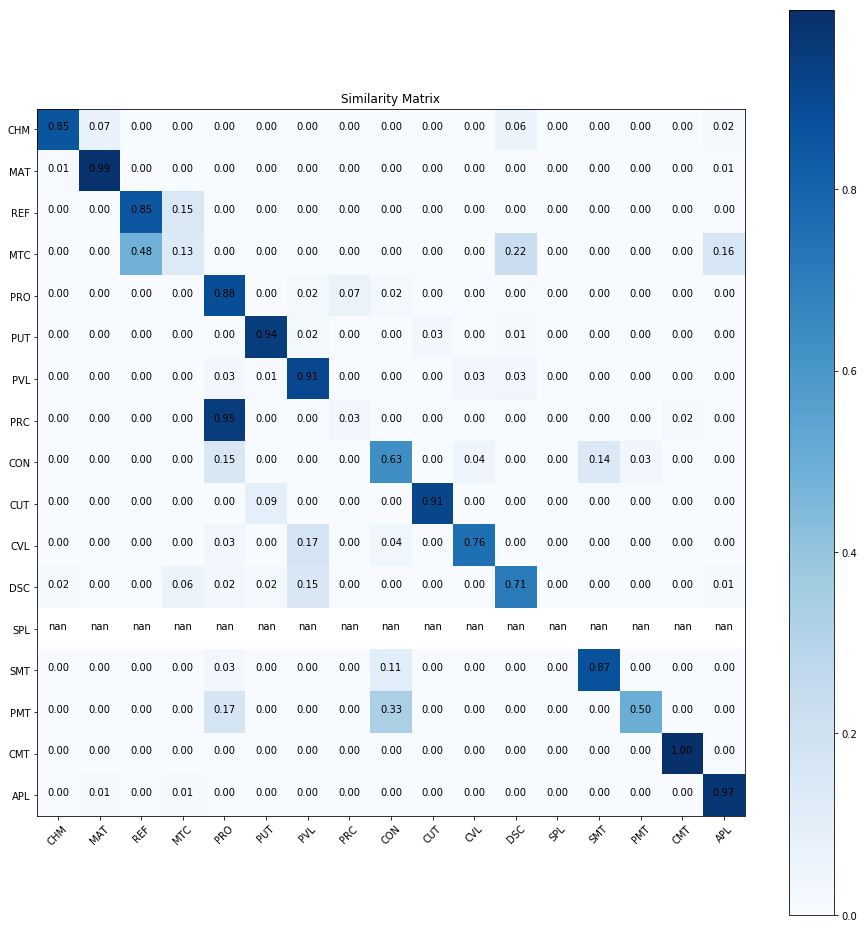

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matstract.nlp.utils import plot_matrix

similarity_matrix, labels = am.similarity_matrix(labels=all_labels, annotators=
                                                  {"anubhavmi6", 
                                                   "qimi6", 
                                                   "benmi6", 
                                                   "alirezami6",
                                                   "peiyuanmi6",
                                                   "michaelmi6",
                                                   "davidmi6",
                                                   "hillarymi6"})
plt.figure(figsize=(13,13))
plot_matrix(similarity_matrix, labels, normalize=True, title="Similarity Matrix")

A list of accuracies for different labels can be obtained

In [21]:
am.accuracies()

{'APL': 0.7397260273972602,
 'CHM': 0.690734055354994,
 'CMT': 0.8763250883392226,
 'CON': 0.6658823529411765,
 'CUT': 0.8023255813953488,
 'CVL': 0.7591836734693878,
 'DSC': 0.7477611940298508,
 'MAT': 0.8634222919937206,
 'MTC': 0.6909090909090909,
 'None': 0.9171066287622399,
 'PMT': 0.5,
 'PRC': 0.5220588235294118,
 'PRO': 0.7414781297134239,
 'PUT': 0.8154269972451791,
 'PVL': 0.6538952745849298,
 'REF': 0.508833922261484,
 'SMT': 0.8203266787658802,
 'SPL': 0.6944444444444444}